<a href="https://colab.research.google.com/github/tadoran/netology_pyda/blob/master/Block%204%20dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


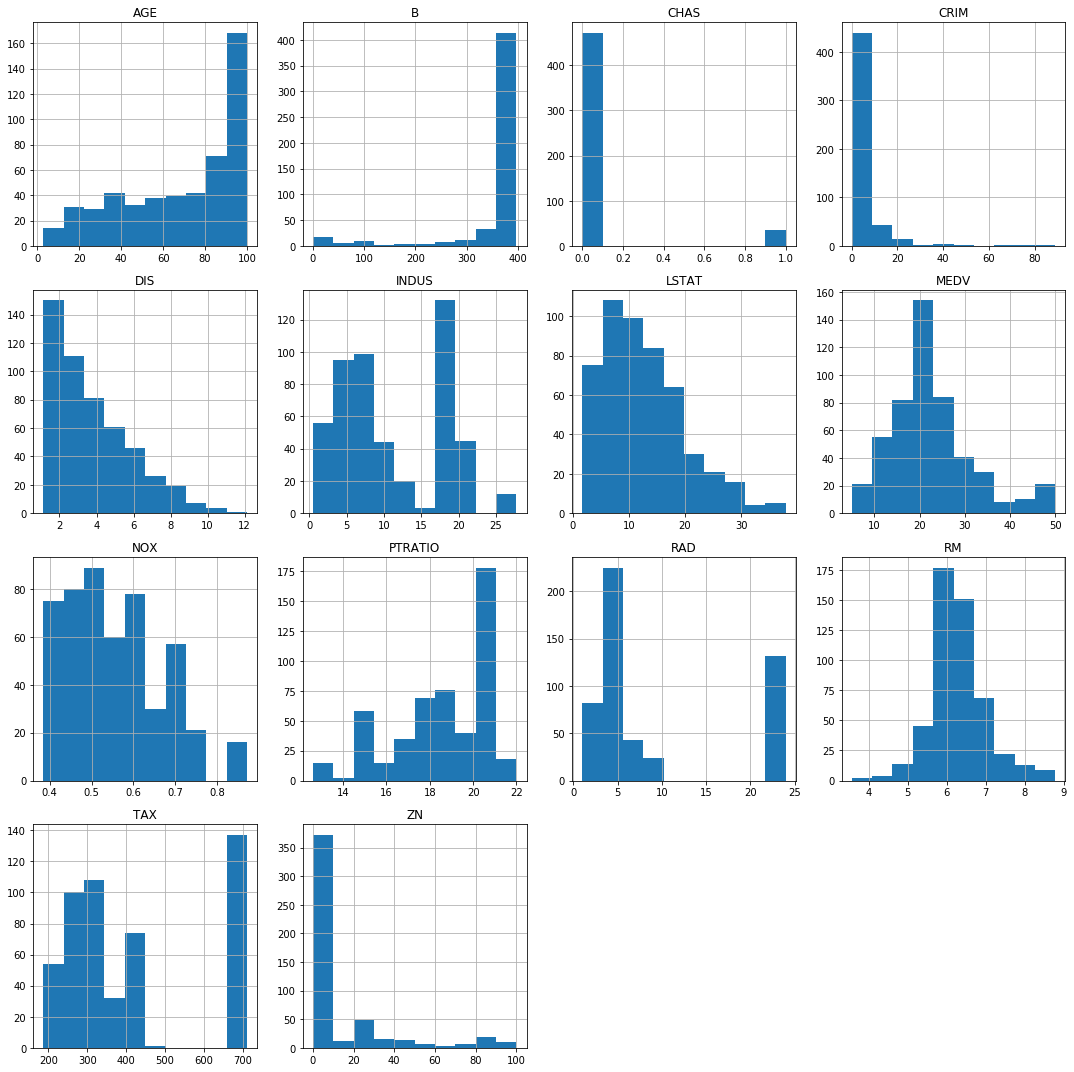

In [4]:
data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [290]:
data["MaxPrice"] = data.MEDV >= 50
data["PriceGroup"] = pd.cut(data.MEDV, bins=5, labels=range(5)).astype(int)
data["PriceGroup"].unique()

array([2, 1, 3, 0, 4])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


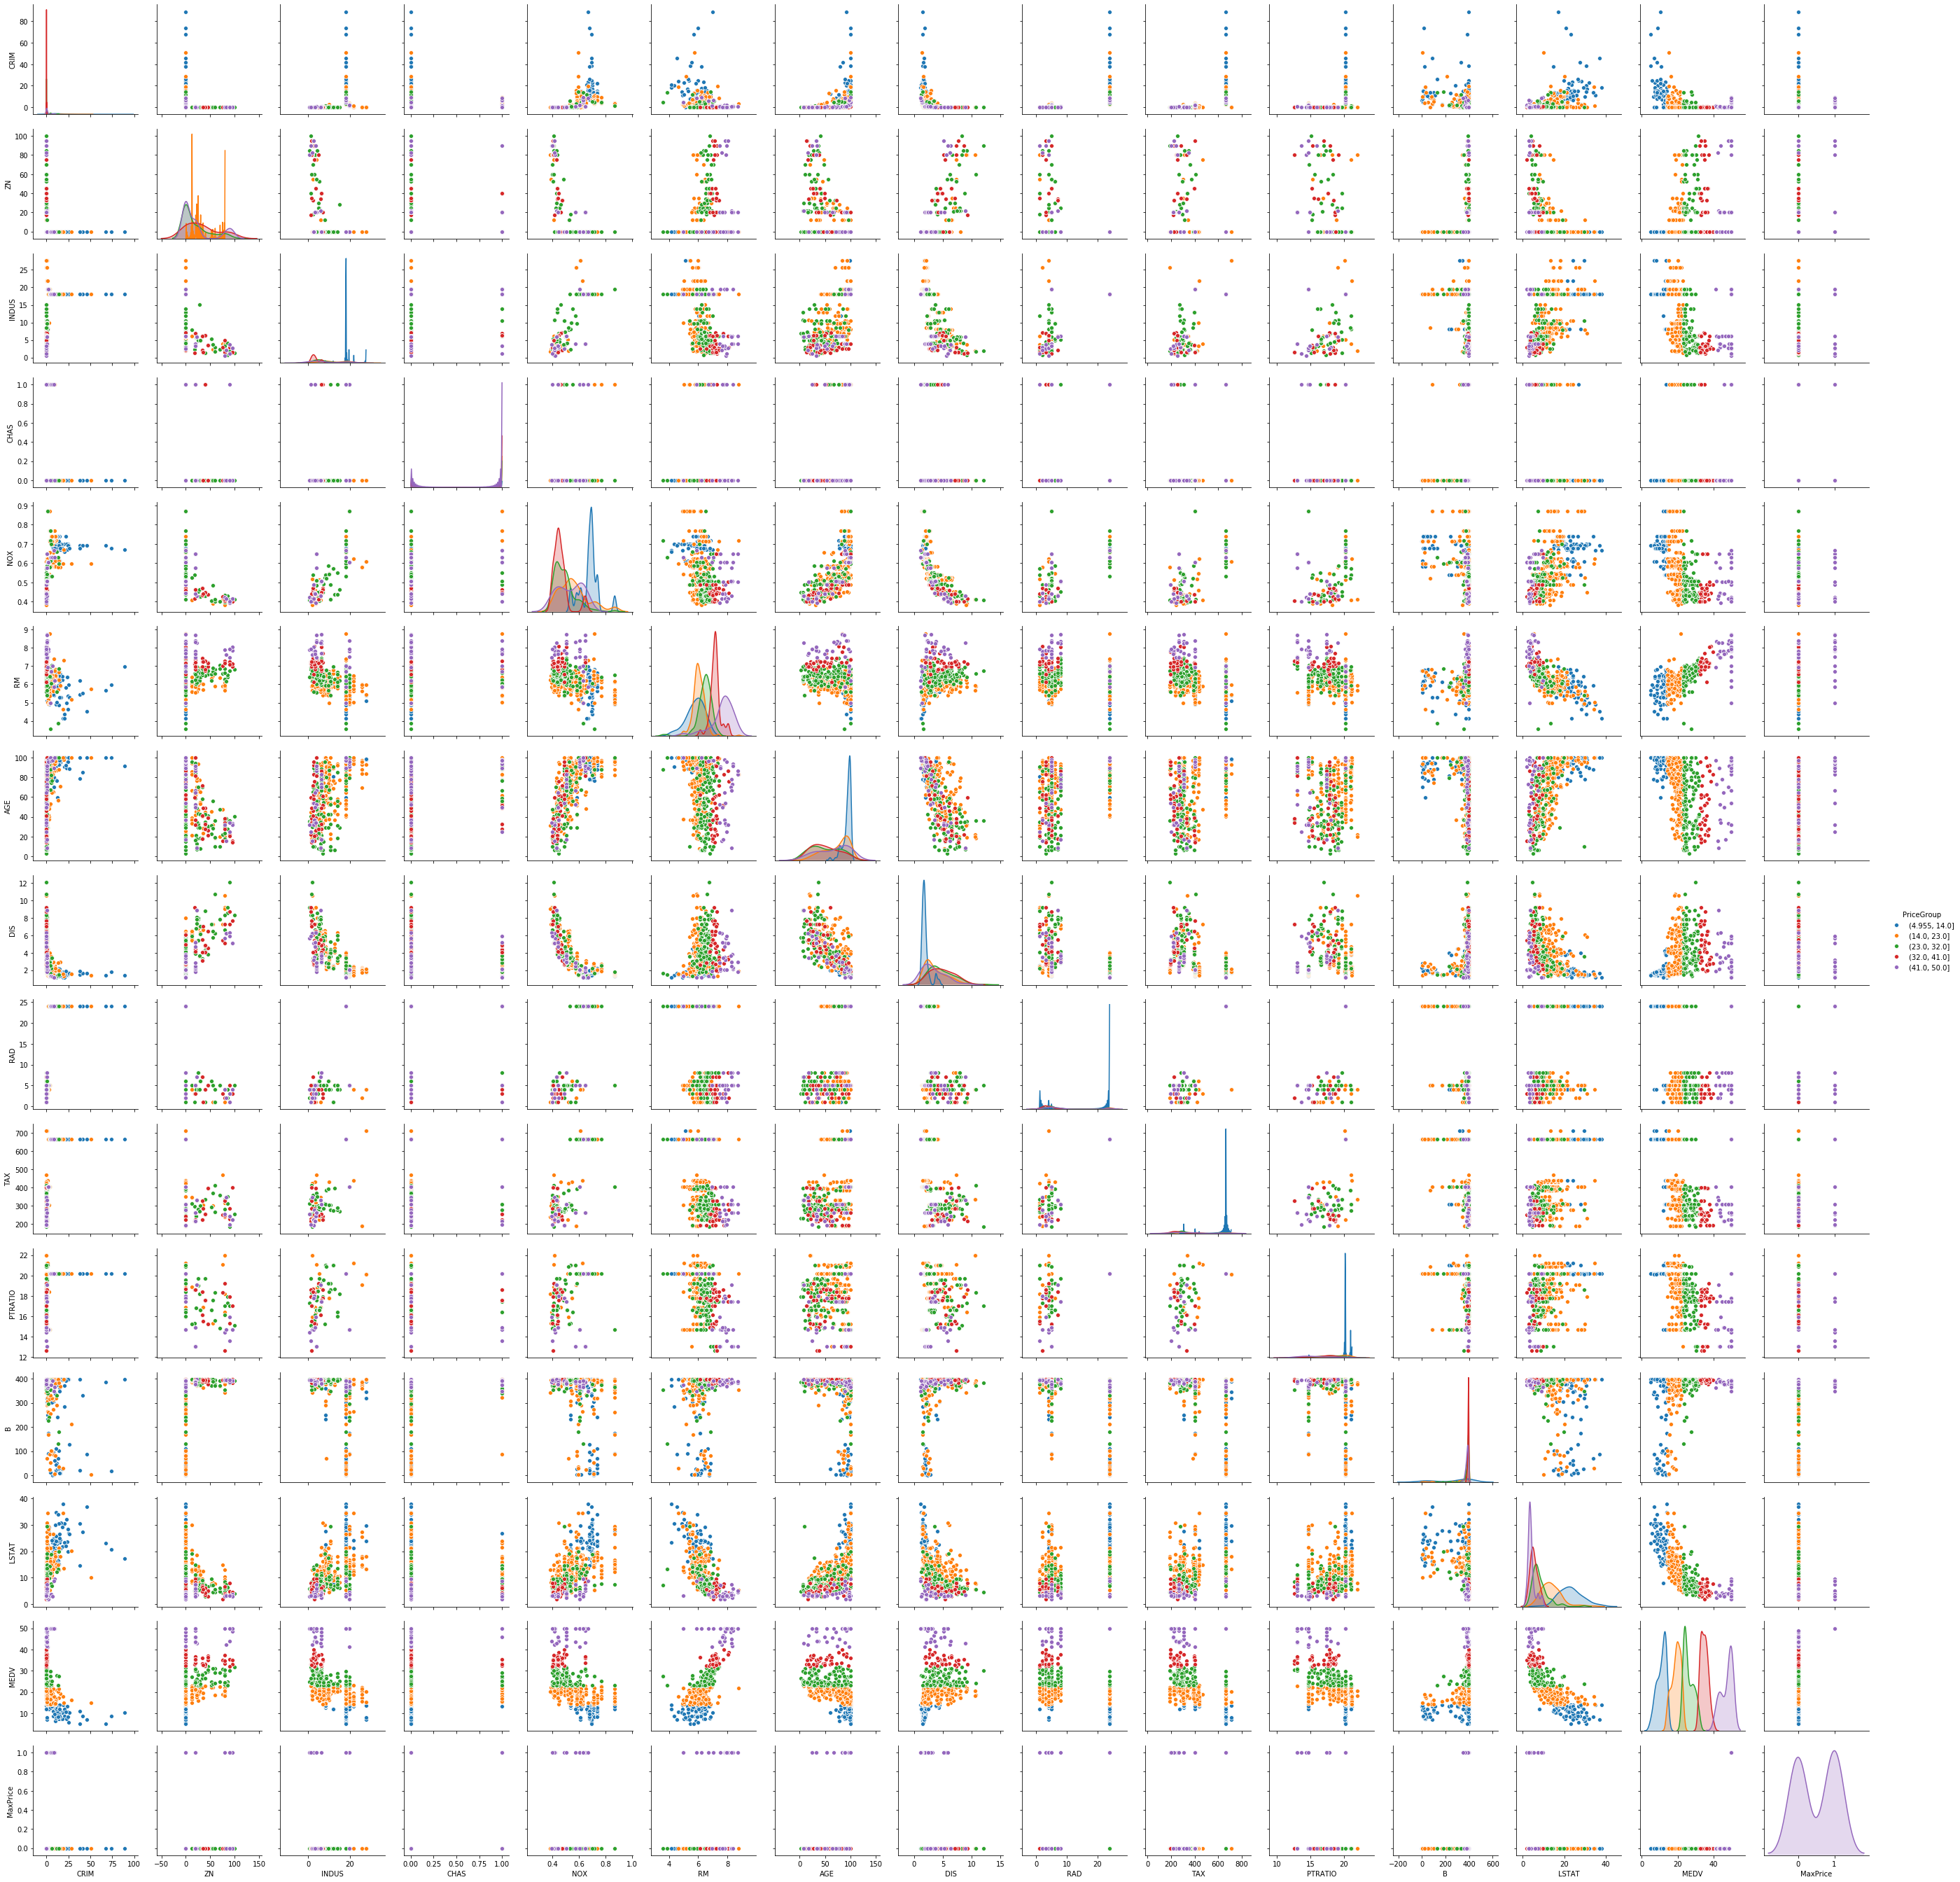

In [269]:
sns.pairplot(data, hue="PriceGroup")

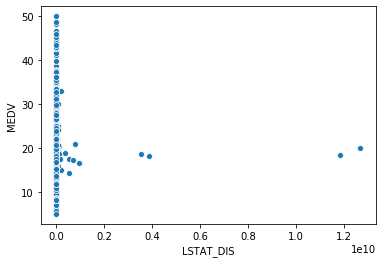

In [320]:
sns.scatterplot(y = set_1.MEDV, x=set_1.LSTAT_DIS)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



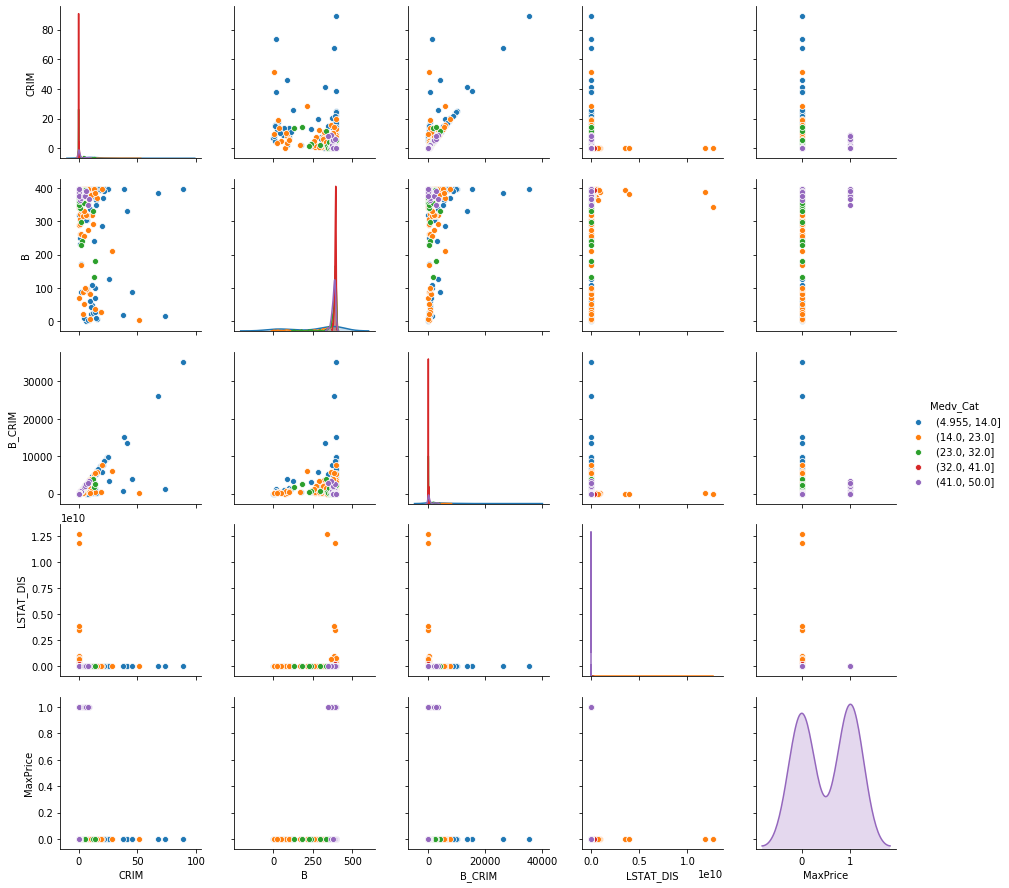

In [319]:
set_1 = data[["CRIM","B","MEDV"]]
set_1["B_CRIM"] = data.B * data.CRIM
set_1["LSTAT_DIS"] = data.LSTAT ** data.DIS
set_1["MaxPrice"] = data.MaxPrice.astype(int)
set_1["Medv_Cat"] = pd.cut(data.MEDV, bins=5)
set_2 = set_1.drop(["MEDV"], axis=1)
# set_2
sns.pairplot(set_2, hue="Medv_Cat")

In [13]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [289]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MaxPrice,PriceGroup
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,3
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False,3


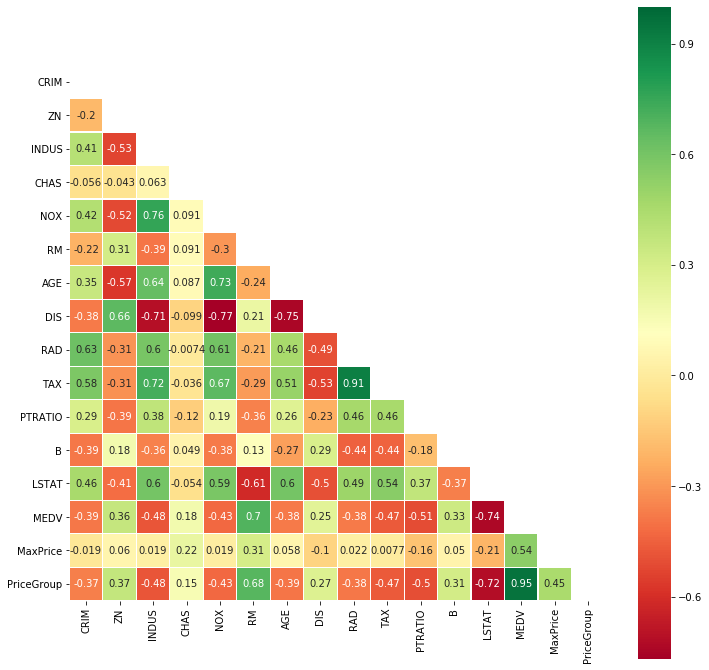

In [291]:
plt.figure(figsize = (12,12))

corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

CHAS - ни с чем сильно не коррелирует, можем спокойно удалять:

In [131]:
corr[corr.abs()< 0.2].CHAS


CRIM      -0.055892
ZN        -0.042697
INDUS      0.062938
CHAS            NaN
NOX        0.091203
RM         0.091251
AGE        0.086518
DIS       -0.099176
RAD       -0.007368
TAX       -0.035587
PTRATIO   -0.121515
B          0.048788
LSTAT     -0.053929
MEDV       0.175260
Name: CHAS, dtype: float64

In [108]:
# Значимые корреляции (> 0.4)
corrs = corr.where(corr.MEDV.abs().between(0.4,1,inclusive=False)).MEDV.dropna().index.to_list()
corrs

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

model = LinearRegression()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


[None, Text(0.5, 0, 'Log(RM)')]

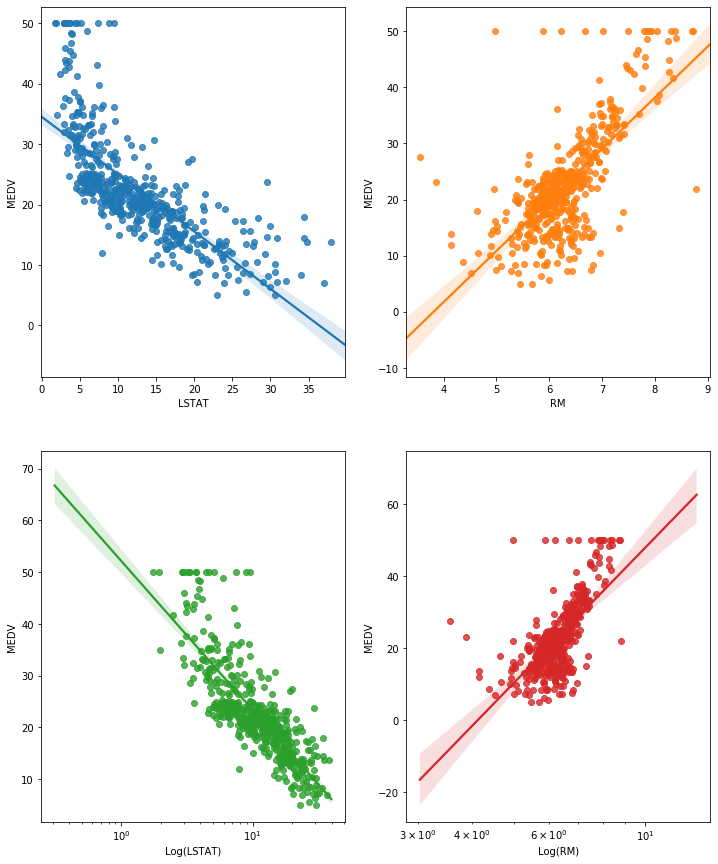

In [414]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,15))
ax = axes.flatten()

sns.regplot(y=data.MEDV, x=data.LSTAT, data=data, ax=ax[0])
ax[0].set(xlabel="LSTAT")

sns.regplot(y=data.MEDV, x=data.RM, data=data, ax=ax[1])
ax[1].set(xlabel="RM")

sns.regplot(y=data.MEDV, x=data.LSTAT, data=data, ax=ax[2],logx=True)
ax[2].set(xscale="log", xlabel="Log(LSTAT)")

sns.regplot(y=data.MEDV, x=data.RM, data=data, ax=ax[3],logx=True)
ax[3].set(xscale="log", xlabel="Log(RM)")

# LSTAT & RM

In [0]:
features = np.array(data.RM * data.LSTAT).reshape(-1, 1)
target = data.MEDV

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 48
)

In [330]:
features[:5]

array([[32.7435 ],
       [58.68794],
       [28.95555],
       [20.57412],
       [38.09351]])

In [331]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4944395673966712

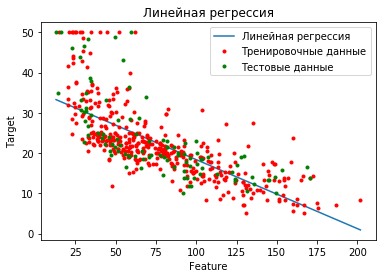

In [332]:
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Линейная регрессия")
x = np.linspace(features.min(), features.max(), 100)
y = (model.coef_ * x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train, y_train, "r.")
plt.plot(X_test, y_test, "g.")
plt.legend(["Линейная регрессия","Тренировочные данные","Тестовые данные"])

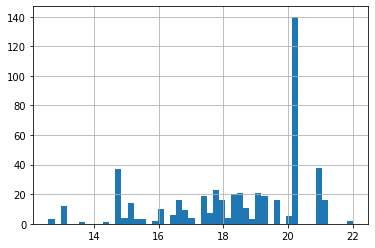

In [333]:
data.PTRATIO.hist(bins=50)

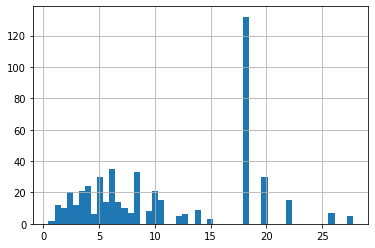

In [334]:
data.INDUS.hist(bins=50)

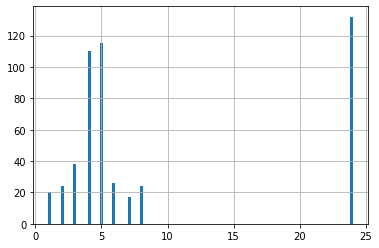

In [124]:
data.RAD.hist(bins=100)

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

# New Section

In [0]:
features = data[corrs]
target = data.MEDV

In [416]:
features

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296,15.3,4.98
1,7.07,0.469,6.421,242,17.8,9.14
2,7.07,0.469,7.185,242,17.8,4.03
3,2.18,0.458,6.998,222,18.7,2.94
4,2.18,0.458,7.147,222,18.7,5.33
...,...,...,...,...,...,...
501,11.93,0.573,6.593,273,21.0,9.67
502,11.93,0.573,6.120,273,21.0,9.08
503,11.93,0.573,6.976,273,21.0,5.64
504,11.93,0.573,6.794,273,21.0,6.48


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 42
)

In [418]:
features[:5]

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296,15.3,4.98
1,7.07,0.469,6.421,242,17.8,9.14
2,7.07,0.469,7.185,242,17.8,4.03
3,2.18,0.458,6.998,222,18.7,2.94
4,2.18,0.458,7.147,222,18.7,5.33


In [419]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6209548378098436

# Log (LSTAT, RM)

In [420]:
features.LSTAT = np.log(data.LSTAT)
features.RM = np.log(data.RM)

target = data.MEDV

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [421]:
features[:5]

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,1.883275,296,15.3,1.605430
1,7.07,0.469,1.859574,242,17.8,2.212660
2,7.07,0.469,1.971996,242,17.8,1.393766
3,2.18,0.458,1.945624,222,18.7,1.078410
4,2.18,0.458,1.966693,222,18.7,1.673351


In [422]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 42
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6875735584722011

# New Section

In [0]:
# features = features.loc[:,["LSTAT","RM"]]
features = data.loc[:,["LSTAT","RM"]]
target = data.MEDV

In [429]:
features[:5]

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [430]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 42
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5739577415025858